# Unsupervised Machine Learning for Customer Market Segmentation:

## Table of Contents:

- I. Introduction
- II. Import Libraries & Datasets
- III. Visualization & Exploration of the Dataset
- IV. K-Means ML Algorithm
- V. Optimal Number Of Clusters Using Elbow Method
- VI. Application of K-Means Method
- VII. Application of PCA

### I. Introduction:

In this hands-on guided project, we will train unsupervised machine learning algorithms to perform customer market segmentation.

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 17 behavioral variables.

"Market segmentation" is the process of dividing the customers into groups or categories based on their features. Market segmentation is crucial for marketers since it enables them to launch targeted ad marketing campaigns that are tailored to customer's specific needs. 

We have been given access to data that contains the products purchased by various users. We would like to build a recommendation system that is able to recommend similar products for the customer based on their previous purchases. For this reason, we are going to use K-Means as unsupervised ML algorithm.

### II. Import Libraries & Datasets:

In [34]:
#Import all necessary libraries packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [35]:
# Display Marketing dataset
creditcard_df = pd.read_csv('C:\\Users\\Pattu\\OneDrive\\Documents\\02. Machine Learning\\01. Projects\\Unsupervised ML for Customer Mkt Segmentation\\Marketing_data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
# Display last rows of the dataframe
creditcard_df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Following is the Data Dictionary for Credit Card dataset :
- CUSTID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

Let's apply info() and get additional insights on our dataframe

In [37]:
creditcard_df.shape

(8950, 18)

There are 18 features with 8950 rows

In [38]:
# View info of DataFrame
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [39]:
# Check for duplicated data
creditcard_df.duplicated().sum()

0

In [40]:
# display statistic basic summary 
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Mean balance is $1,564

- Balance frequency is frequently updated on avg 0.9

- Purchases vg is $1,000
- Average purchase frequency is around 0.5
- Average credit limit is around 4,500
- Percent of full payment is 15%
- Average tenure is 11 years

In [41]:
# display the features of the customer who made the maximim "ONEOFF_PURCHASES"
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==creditcard_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [42]:
# display the features of the customer who made the maximum cash advance transaction
creditcard_df[creditcard_df['CASH_ADVANCE']==creditcard_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


There are 123 cash advance transactions that the customer made which means that he uses a lot cash advances. While, the percenage of full payment of this customer is actually zero which means that he never fully paid his credit and then he doesn't generate revenue for the bank.

### III. Visualization & Exploration of the Dataset:

In [43]:
# Check for missing values
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing values for MINIMUM_PAYMENTS and only one missing value for CREDIT_LIMIT 

In [44]:
# Fill up the missing elements with mean value of the 'MINIMUM_PAYMENT' 
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df['MINIMUM_PAYMENTS'].fillna(creditcard_df['MINIMUM_PAYMENTS'].mean(),inplace=True)
creditcard_df['CREDIT_LIMIT'].fillna(creditcard_df['CREDIT_LIMIT'].mean(), inplace = True)

In [45]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [46]:
# check for duplicate dentries in the data
creditcard_df.duplicated().sum()

0

Note that there are 0 duplicated entries in our dataset which means that all data entries in our dataframe are unique.

In [47]:
# Drop Customer ID column 'CUST_ID'
creditcard_df.drop('CUST_ID', axis=1, inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [48]:
n = len(creditcard_df.columns)
n

17

In [49]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

We are going to use distplot to perform data visualization by combining matplotlib.hist function and Seaborn kdeplot.

C:\Users\Pattu\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pattu\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pattu\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

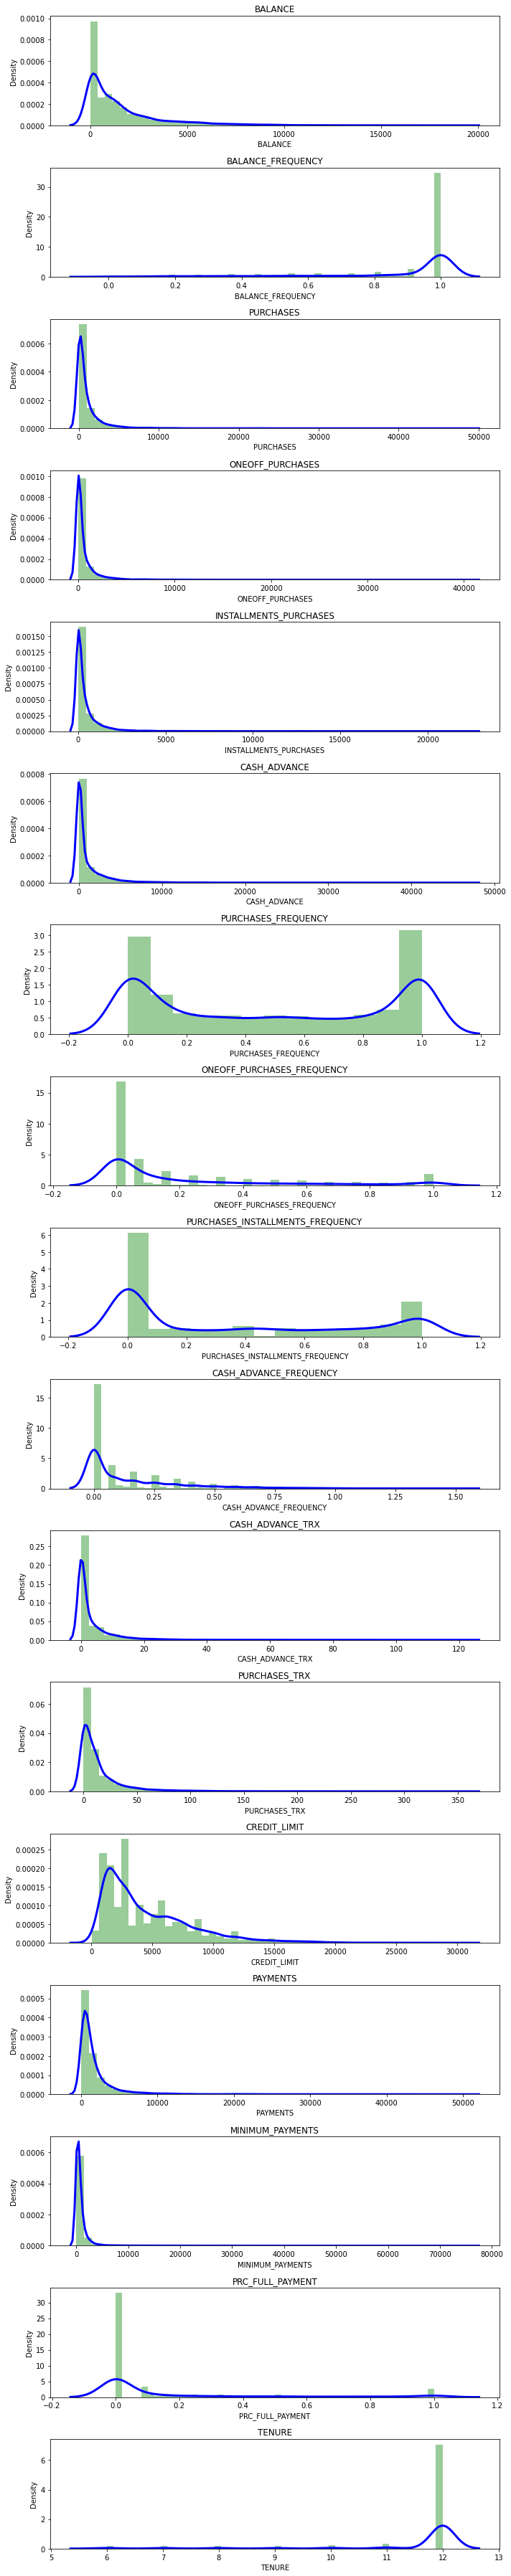

In [50]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

- The range of average balance is 15,000
- Most customers update their balance frequently as it is around 1
- When it comes to the purchases frequency, we coclude that there are 2 distincts group of customers: some customers have zero frequency while others have a high frequencyclose to 1.
- Most of customers don't pay their credit balance in full.
- Average tenure is 11 years which means a lot of customers a very loyal to the bank.

<AxesSubplot:>

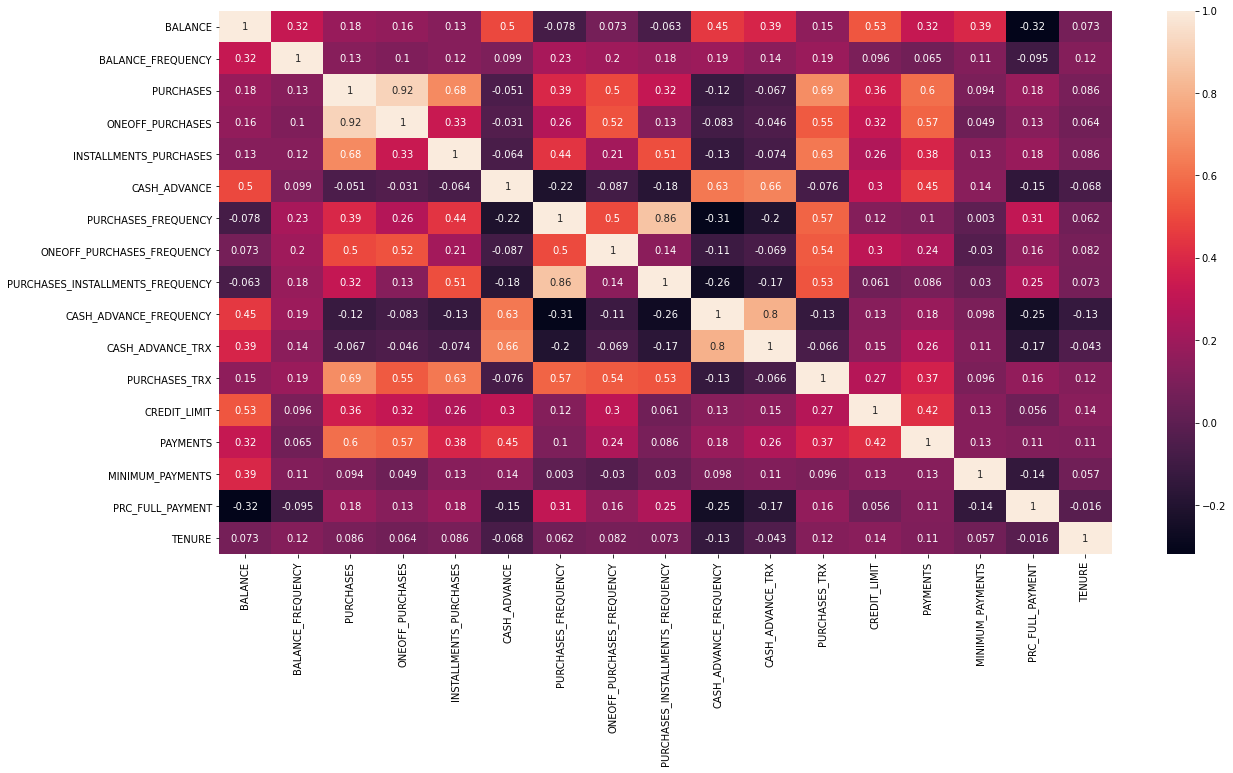

In [51]:
# Plot the correlation matrix between features
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot=True)

### IV. K-Means ML Algorithm:

- K-means is an unsupervised ML algorithm that partitions observations into a fixed number K of non-overlapping clusters, Each cluster is characterized by its centroid ( a center) and each observation is assigned by the algorithm to the cluster with the centroid to which that observation is closest.  - K-Means algorithm follows an iterative process. The K-Means algorithm will continue to iterate until no observation is reassigned to a new cluster (ie, no need to recalculate new centroids).
- The algorithm has then converged and reveals the final k clusters with their member observations.
- The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.
- After the customers have provided the bank with their ages and their savings (features), we have to cluster all these credit card of customers into different groups or categories based on their features. For example, the first group will be the customers with younger age and with savings, the second group is the group of customers who are older but have high savings, however the third one is the customers who are older but with little savings.

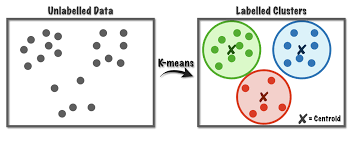

K-Means Algorithm Steps:
- K-Means Algorithm starts by determining the position of the k initial random centroids;
- The algorithm then analyzes the features for each observation. Select random K points that are going to be the centroids for each cluster;
- Based on the distance measure that is utilized, K-Means assign each observation to its closest centroid, which defines a cluster, doing so will enable us to create K number of clusters;
- Calculate a new k centroid for each cluster where the centroid is the average value of their assigned observations.
- K-Means then reassigns the observations to the revised centroids, again redefining the clusters in terms of observations that are included and excluded;
- Finally, go to step and repeat. 

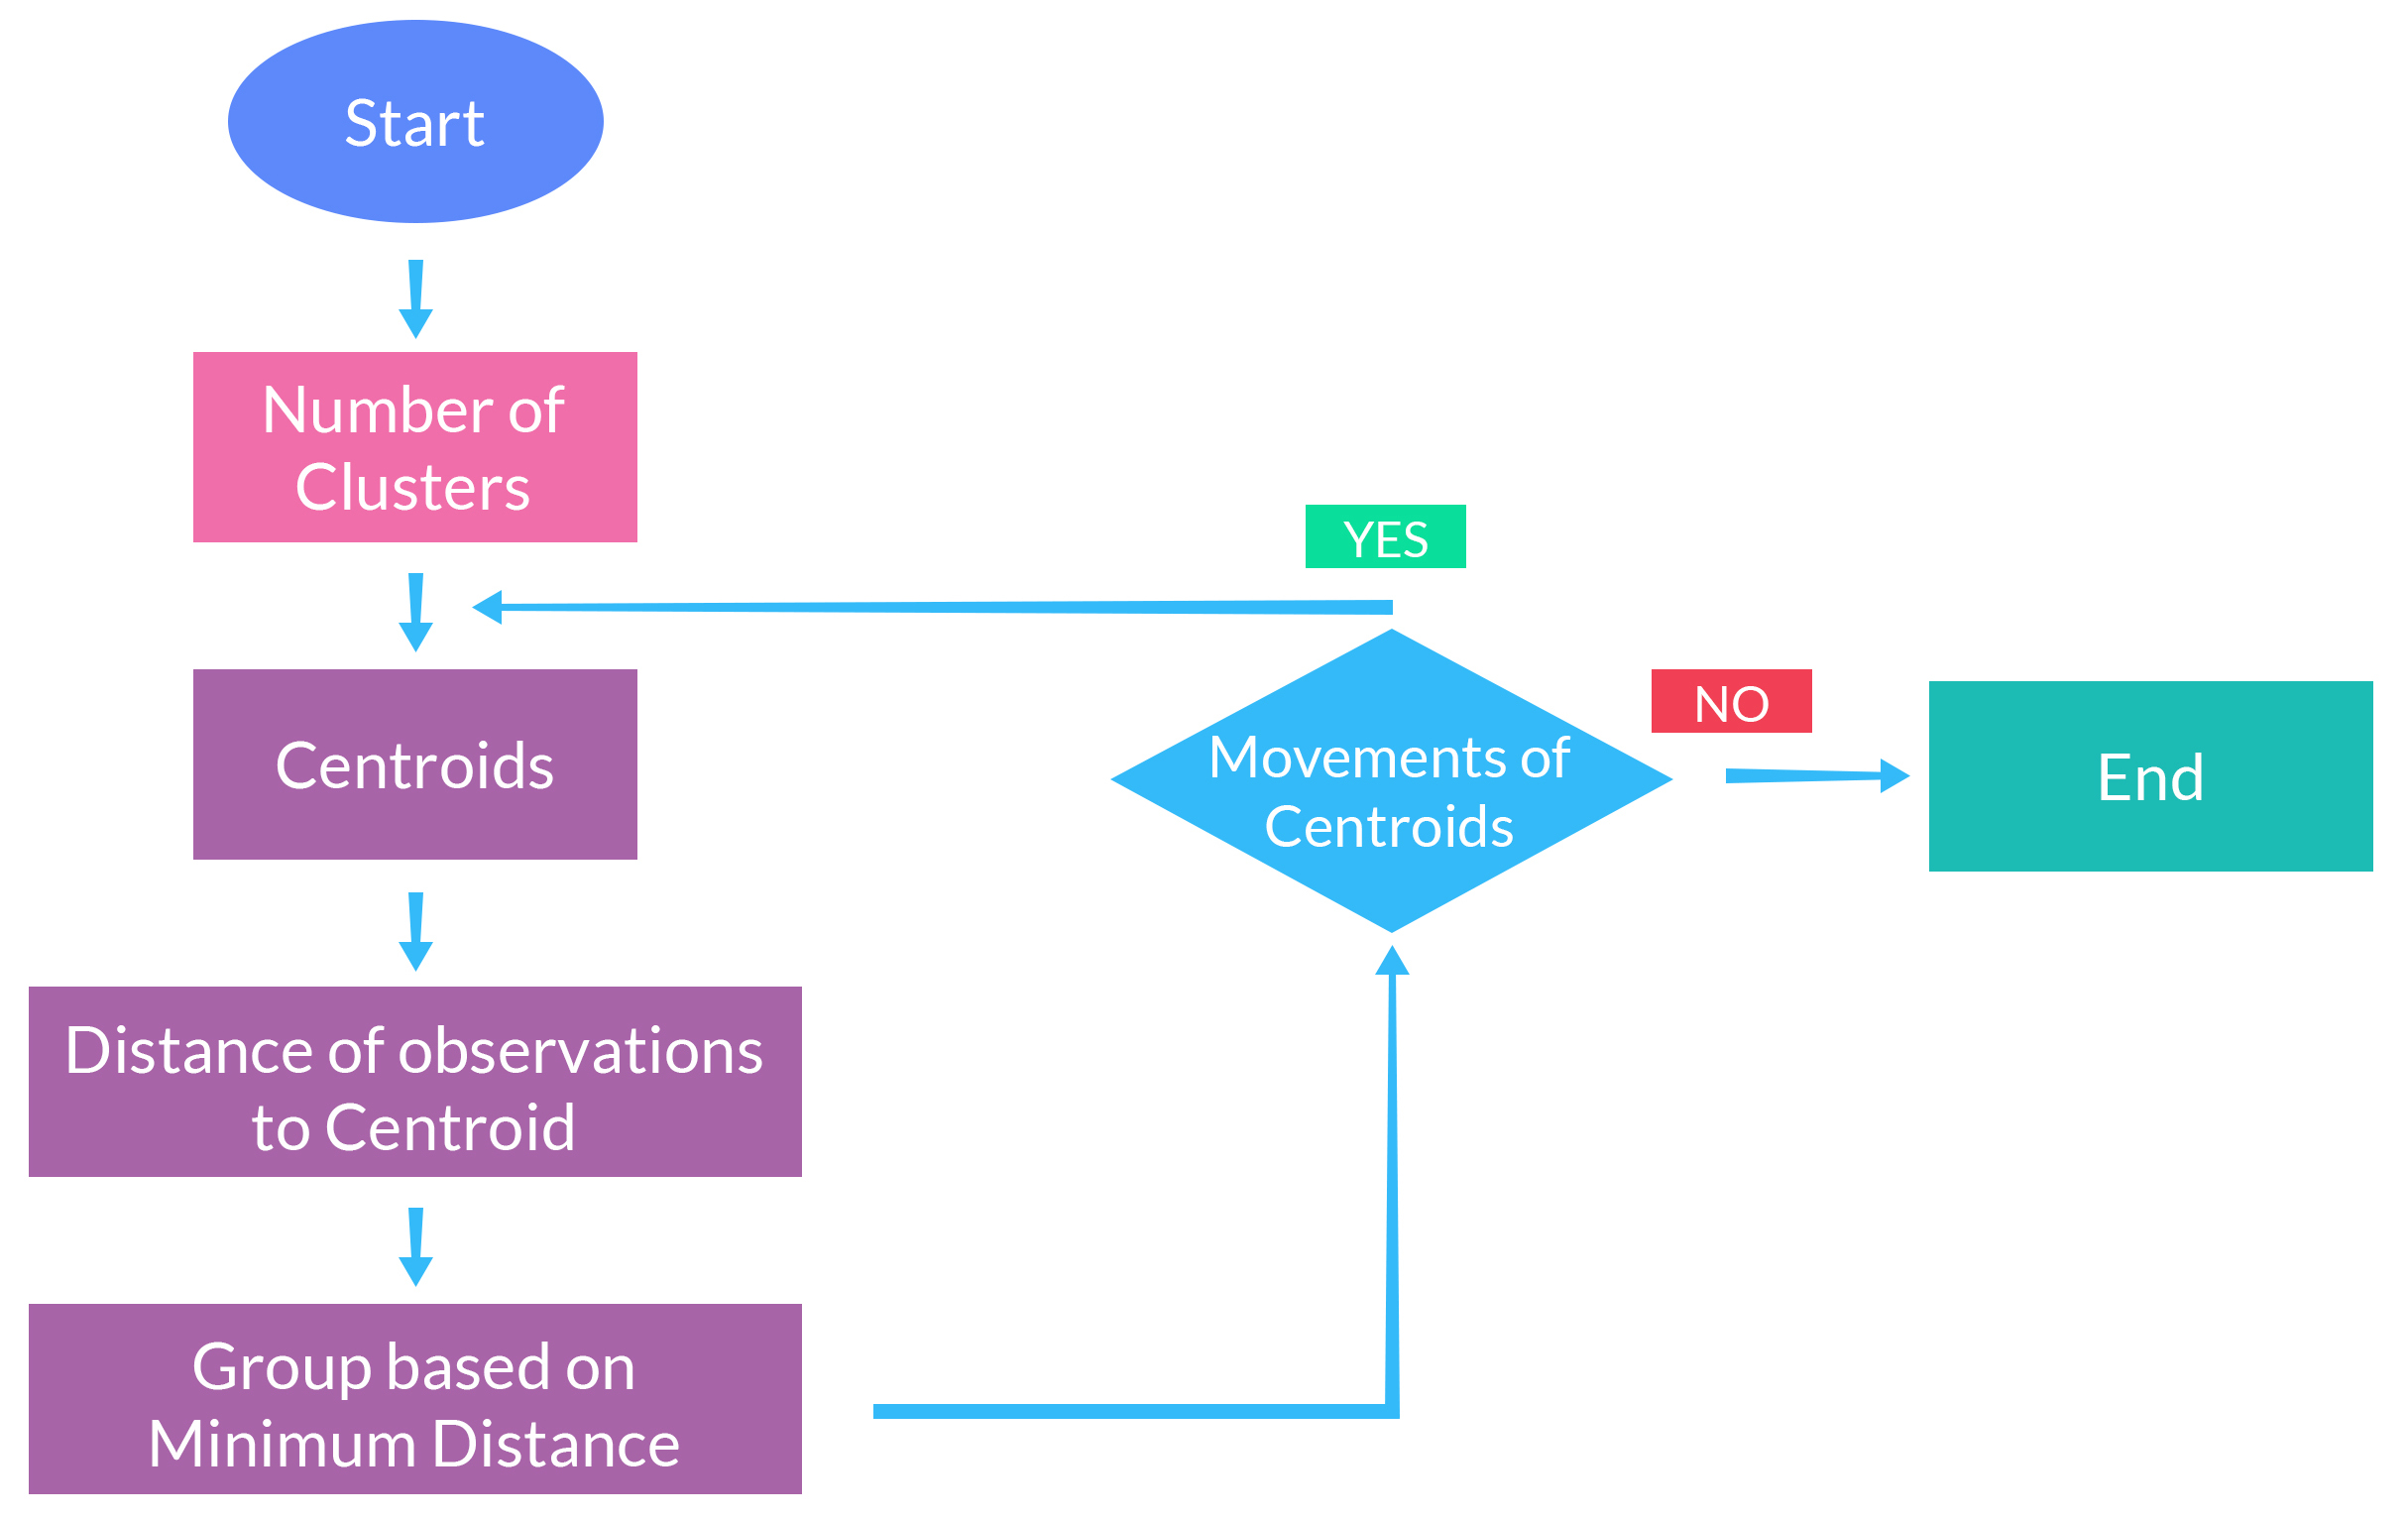

K-means clustering algorithm terminates after a fixed number of iterations is reached
K-means terminates when the centroid locations do not change between iterations

### V. Optimal Number Of Clusters Using Elbow Method:

The elbow method is a heuristic method of interpretation of consistency within cluster analysis designed to help find the appropriate number of clusters in a datasets. 

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 

WCSS is the sum of squared distance between each point and the centroid in a cluster. To calculate WCSS, we should first find the Euclidean distance between a given point and the centroid to which it is assigned. Then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points.

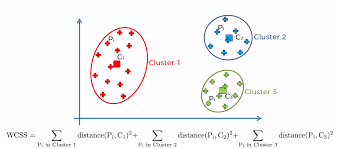

When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. 

WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

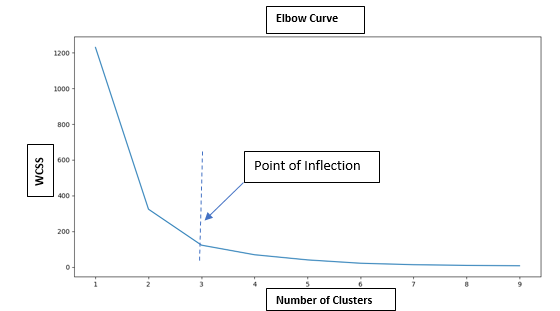

If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best (here k = 3).

In [53]:
# scale the data 
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [54]:
creditcard_df_scaled.shape

(8950, 17)

In [55]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

We are going to create first a for loop that calculate the WCSS for every value of the clusters and then we are going to plot the curve to find the optimal value of k.

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. However, the values does not reduce linearly until 8th cluster. 
Let's choose the number of clusters to be 7 or 8 to be the optimal number of clusters in this case.

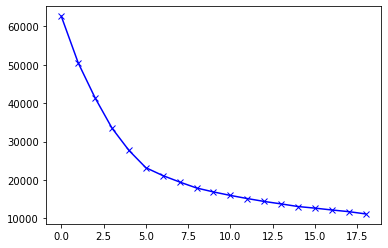

In [59]:
scores_2 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled[:,:7])
    scores_2.append(kmeans.inertia_)
    
plt.plot(scores_2, 'bx-')

Note that when we choose the entire number of features, we came up with 8 as the optimal number of clusters. So, if we actually choose only the 7 features we can get by 5 clusters only.

### VI. Application of K-Means Method:

Next, we would like to train k-means algorithm to perform customer market segmentation in Scikit-Learn. Earlier we found that the optimal number of clusters is around 7. So, we are going to specify the number of clusters to be 7 and then we are going to apply the fit method (training the model) and finally labels (cluster) associated to each data point.

In [78]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [79]:
kmeans.cluster_centers_.shape

(7, 17)

In [80]:
# create the dataframe
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
1,-0.701719,-2.134810,-0.307505,-0.230900,-0.302771,-0.321909,-0.549111,-0.429500,-0.442252,-0.520230,-0.375627,-0.417099,-0.172908,-0.201909,-0.257269,0.293989,0.199793
2,-0.335410,-0.341582,-0.283994,-0.209054,-0.287071,0.066403,-0.193767,-0.272626,-0.226075,0.303329,-0.002270,-0.384892,-0.551431,-0.389121,-0.209952,0.012044,-3.190495
3,0.134838,0.430121,0.944254,0.896895,0.584904,-0.306243,1.094480,1.863043,0.542971,-0.405950,-0.315660,1.206368,0.704301,0.396463,-0.033700,0.453666,0.308057
4,-0.373142,0.329963,-0.042317,-0.235360,0.332171,-0.369655,0.979637,-0.357752,1.171797,-0.480017,-0.364009,0.169062,-0.282132,-0.225174,-0.028765,0.310219,0.253878
5,1.667849,0.392669,-0.206369,-0.150698,-0.211183,1.989173,-0.457319,-0.192251,-0.405086,1.905381,1.917459,-0.244548,1.009534,0.830993,0.551974,-0.391311,0.068462
6,0.007225,0.403672,-0.343781,-0.225062,-0.399277,-0.104920,-0.809796,-0.335909,-0.752159,0.084302,-0.042037,-0.464470,-0.301539,-0.249116,-0.015816,-0.452943,0.272242


Let's note that the problem with this presentation is that data here is already scaled. So, we have to apply the inverse transform to scale the data back to the original values.

In [81]:
# perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
1,103.905679,0.371554,346.216442,209.190589,137.275475,303.813584,0.269966,0.074329,0.188675,0.031041,0.685450,4.342304,3865.340155,1148.636336,264.651249,0.239701,11.784693
2,866.346588,0.796353,396.446254,245.449794,151.472651,1118.121121,0.412583,0.121128,0.274589,0.195843,3.233333,5.142857,2488.118174,606.676652,374.921780,0.157237,7.247619
3,1845.128994,0.979163,3020.618474,2081.099225,939.988732,336.665990,0.929618,0.758239,0.580228,0.053909,1.094679,44.695618,7056.985346,2880.864105,785.669465,0.286404,11.929577
4,787.811133,0.955436,912.794887,201.787490,711.446139,203.687296,0.883526,0.095733,0.830139,0.039088,0.764735,18.912083,3467.937231,1081.287021,797.170904,0.244448,11.857073
5,5035.962570,0.970290,562.294011,342.309955,220.097654,5150.259467,0.306807,0.145106,0.203446,0.516430,16.334078,8.631285,8167.546978,4138.787648,2150.558268,0.039263,11.608939
6,1579.513410,0.972897,268.712300,218.880349,50.006266,758.848199,0.165340,0.102249,0.065510,0.152014,2.961958,3.164847,3397.328872,1011.978540,827.347104,0.021236,11.881648


- First Customers cluster (Transactors) are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104) and cash advance (303), Percentage of full payment = 23%.


- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector) have the highest balance (5000) and cash advance (5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16000) and low percentage of full payment (3%).


- Third customer cluster (VIP/Prime) have high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits.


- Fourth customer cluster (low tenure) are customers with low tenure (7 years), low balance.

In [82]:
labels.shape

(8950,)

In [83]:
labels.max(), labels.min()

(6, 0)

In [85]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([6, 2, 1, ..., 5, 5, 5])

In [88]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


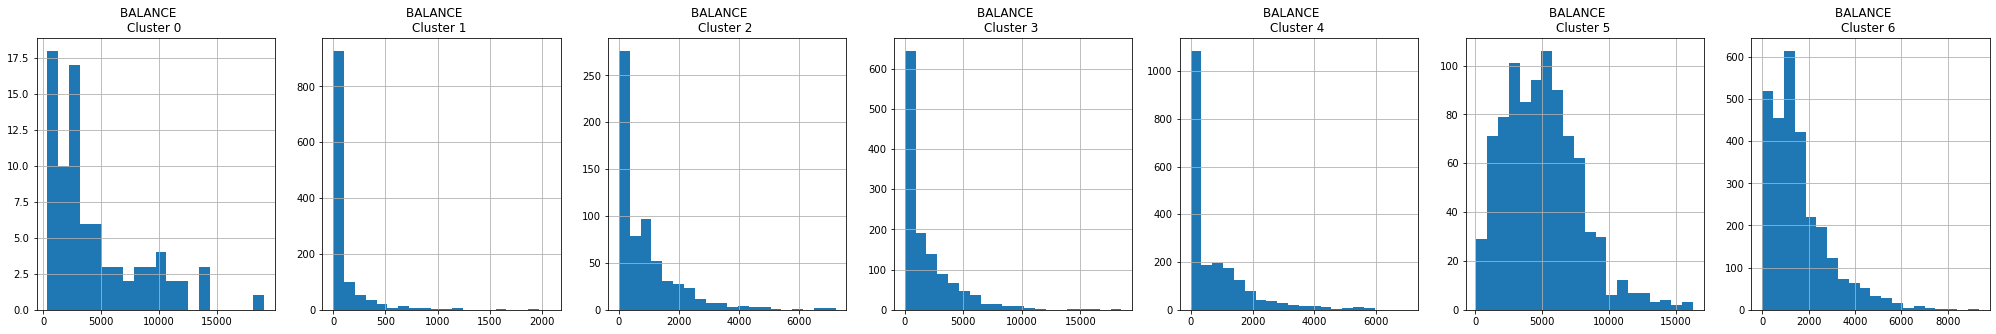

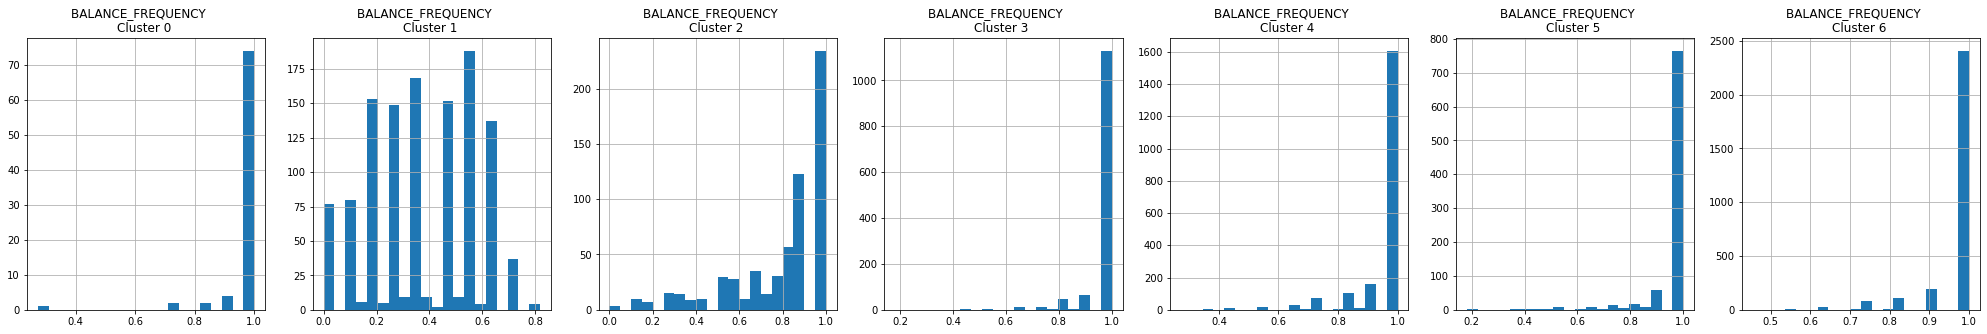

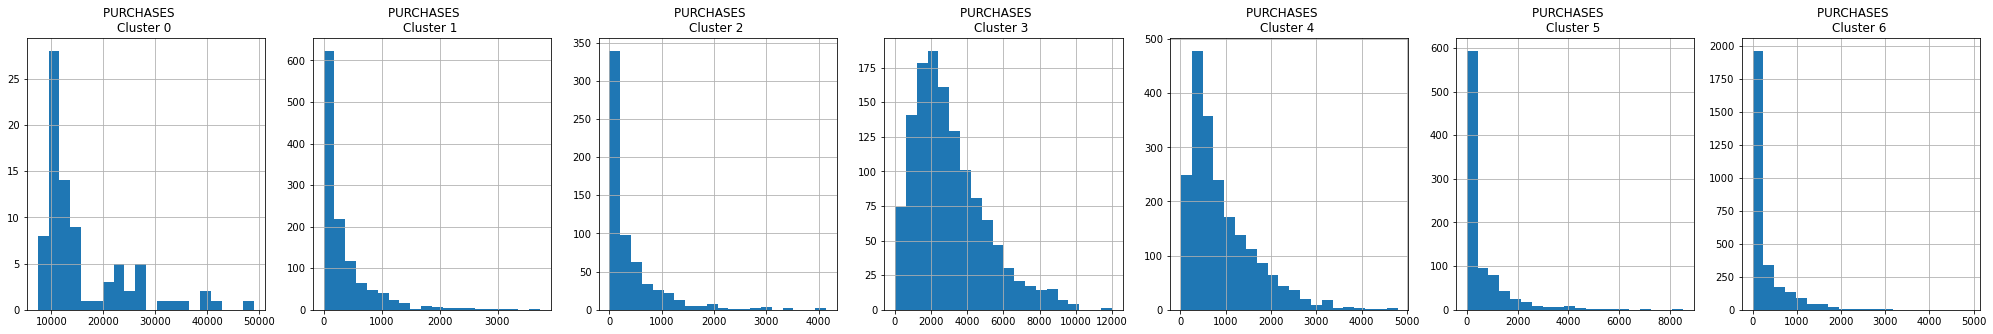

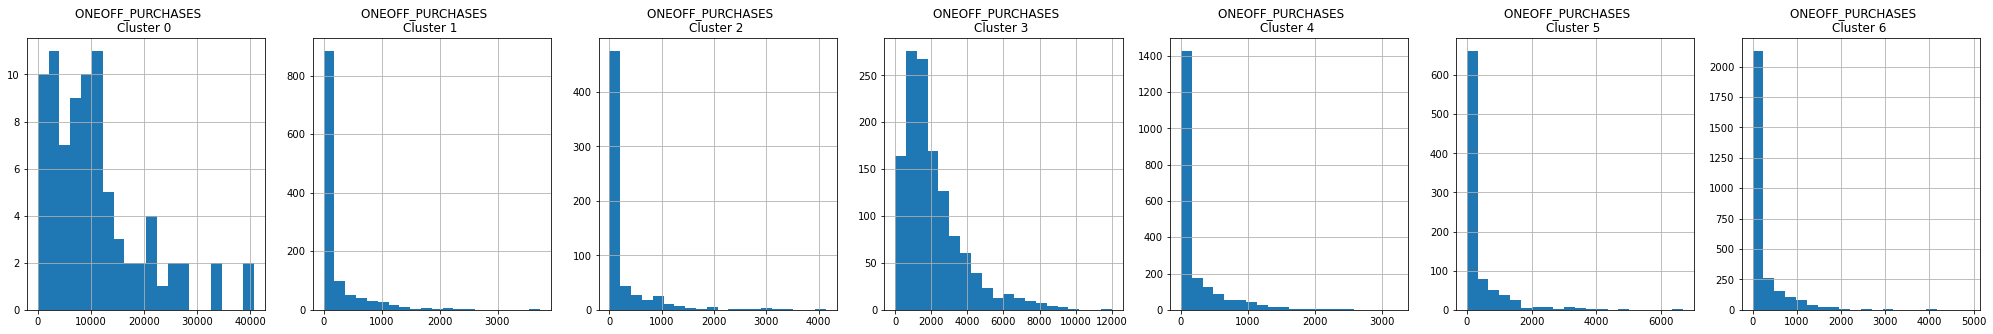

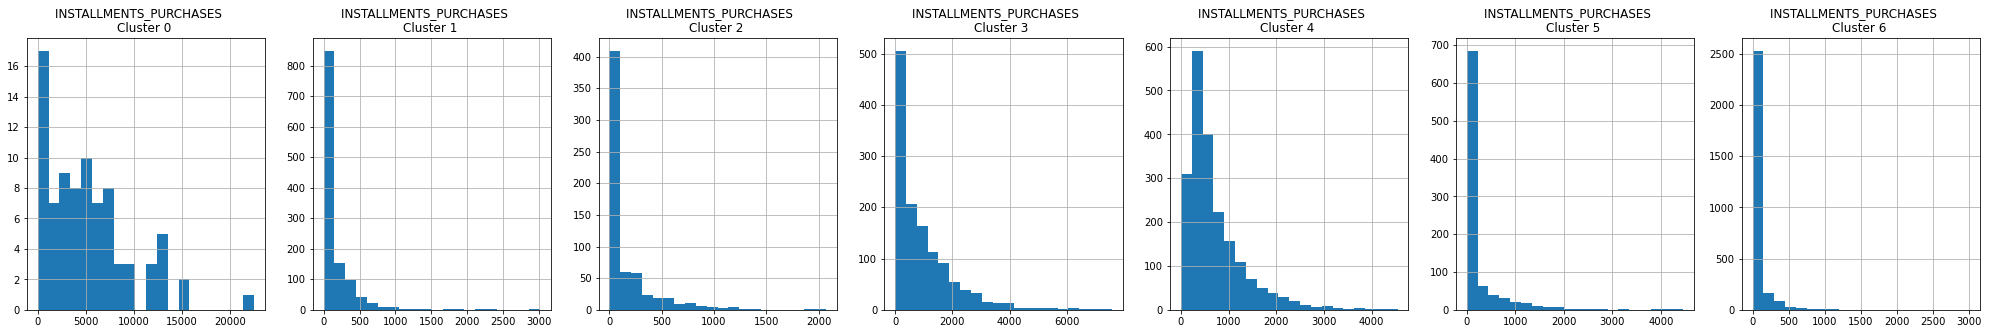

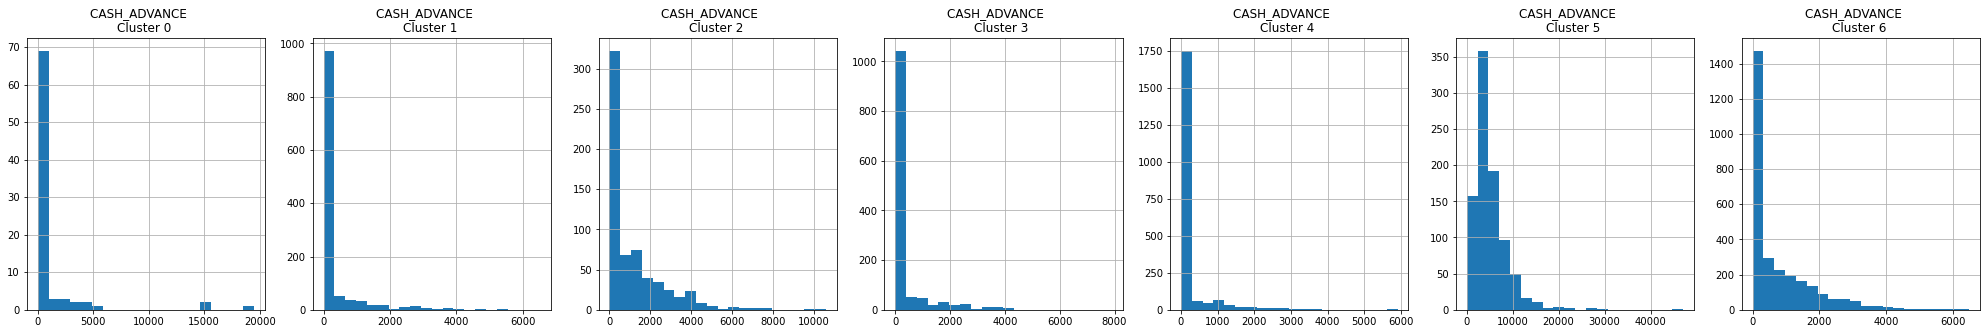

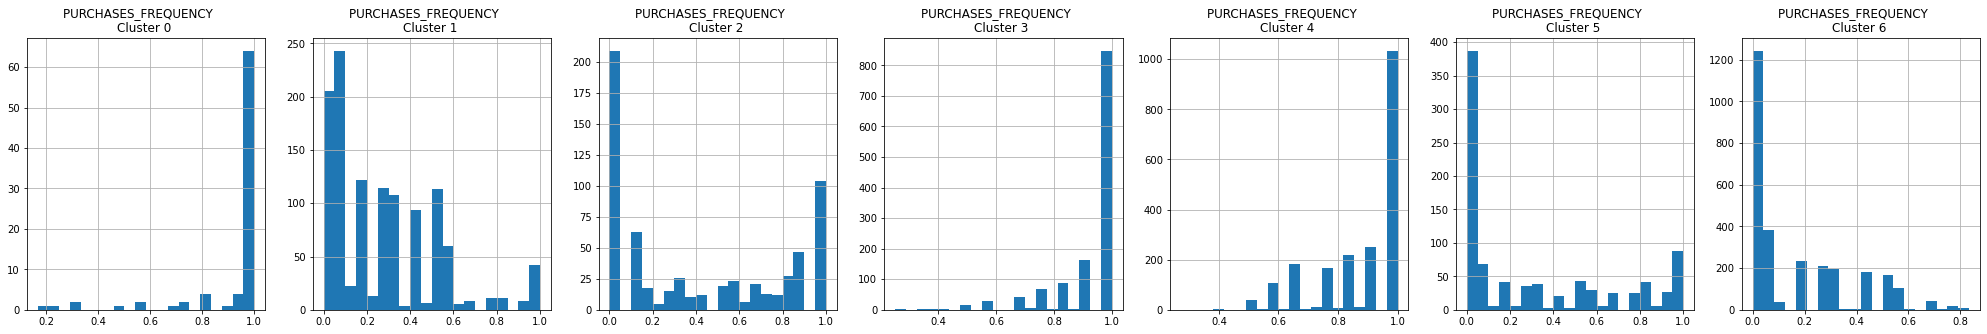

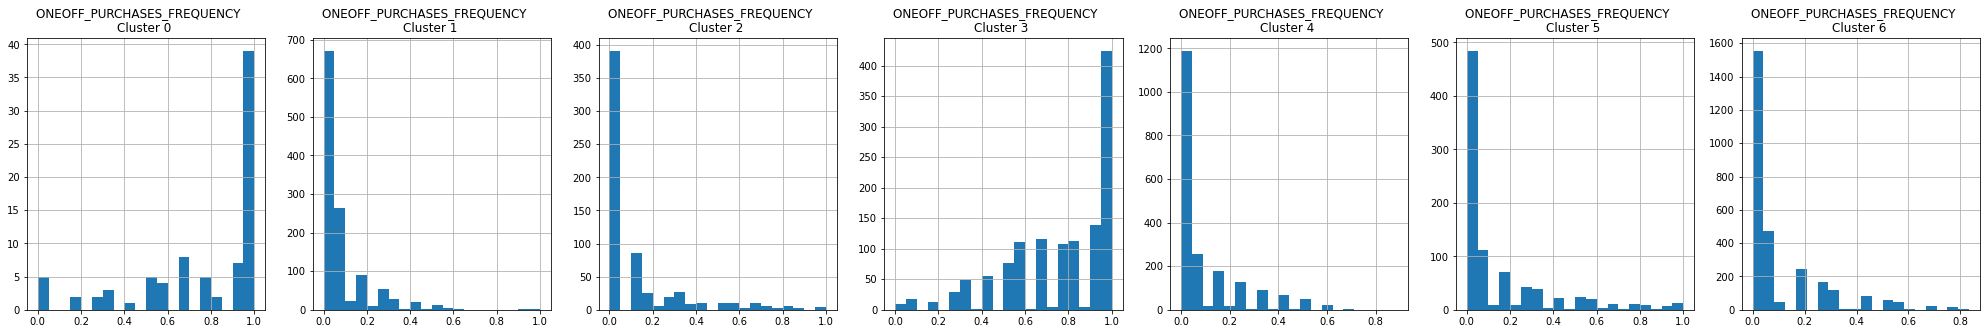

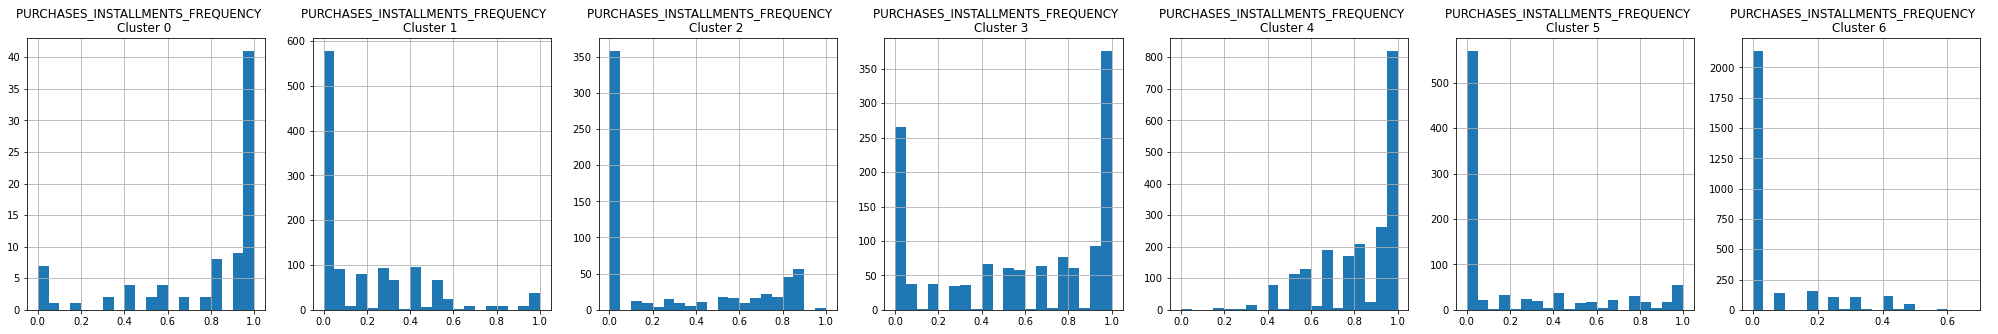

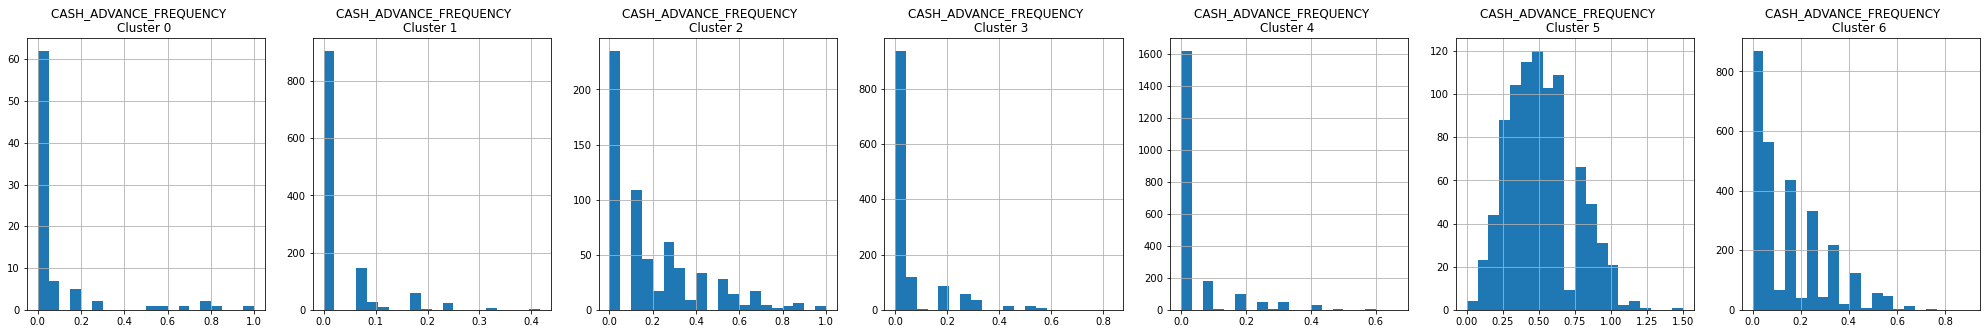

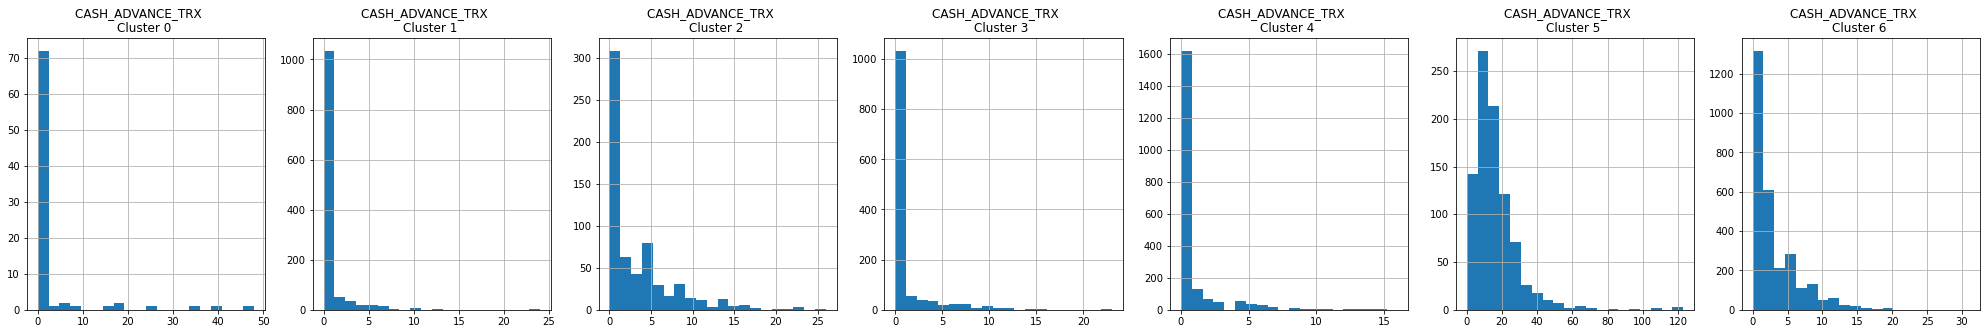

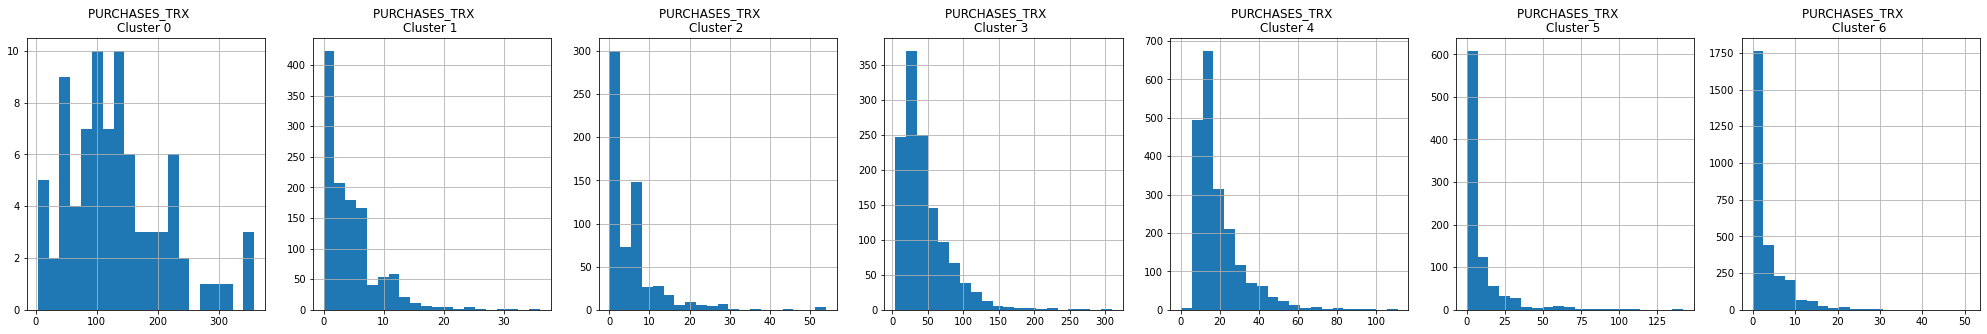

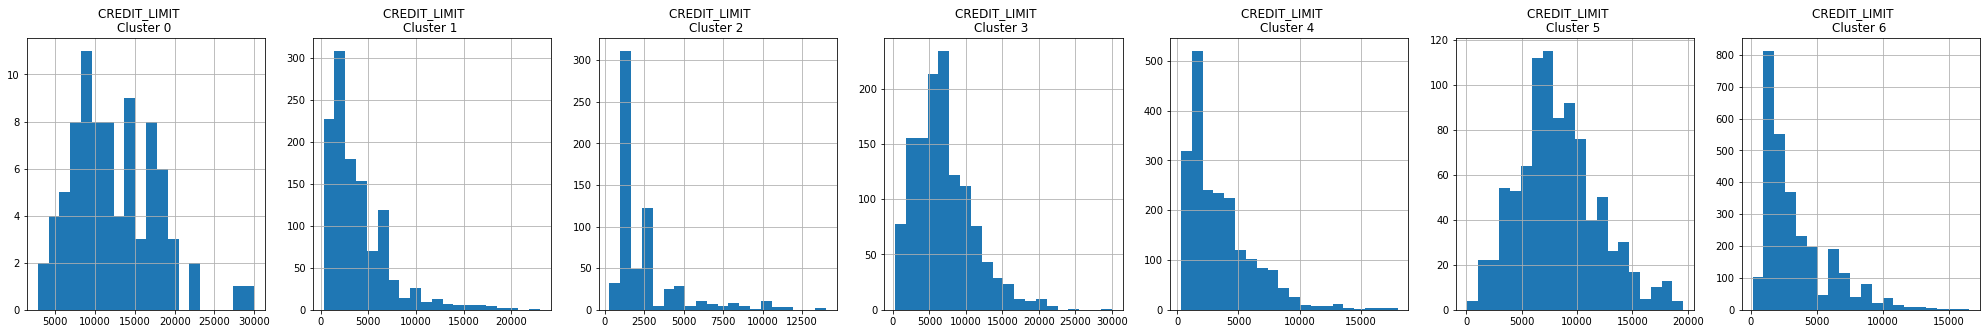

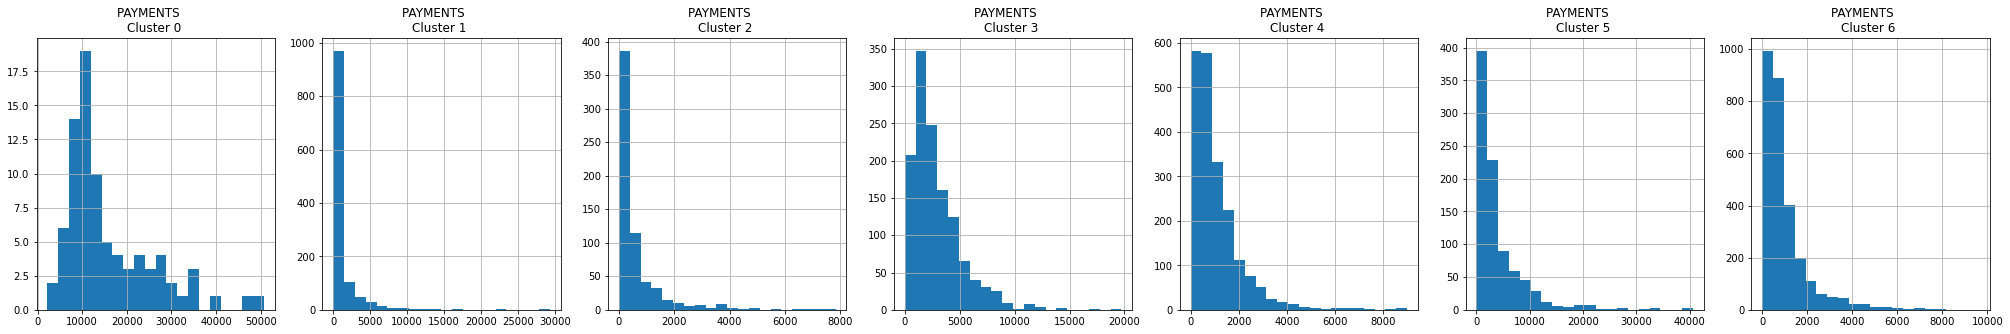

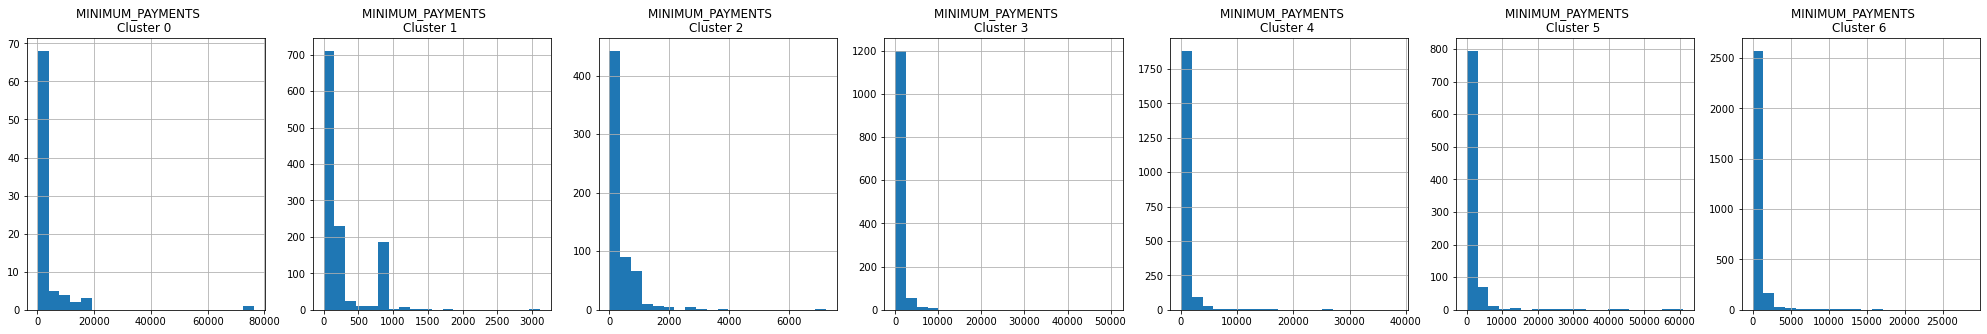

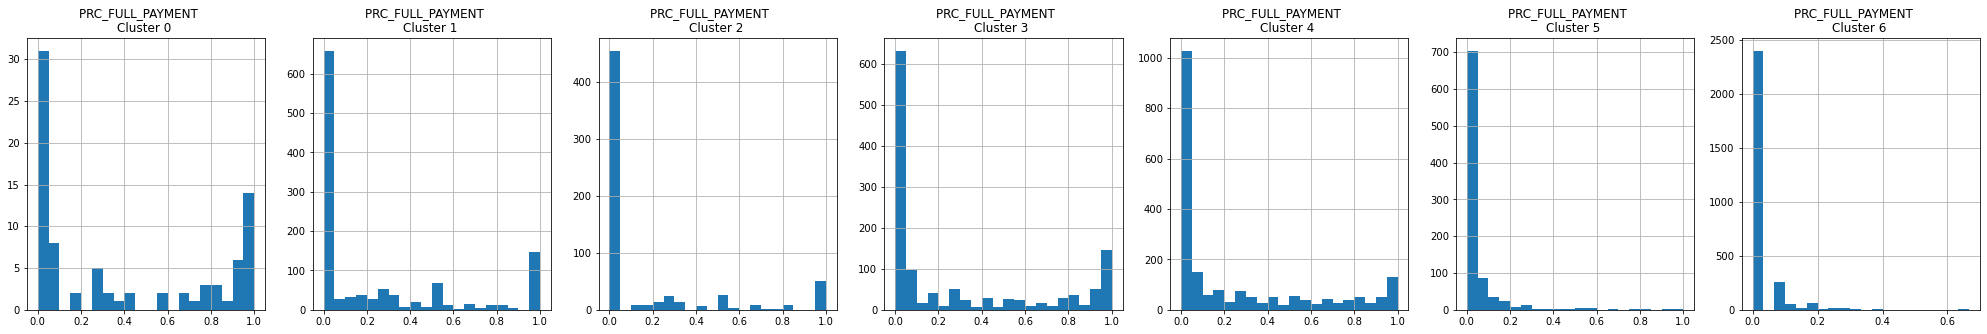

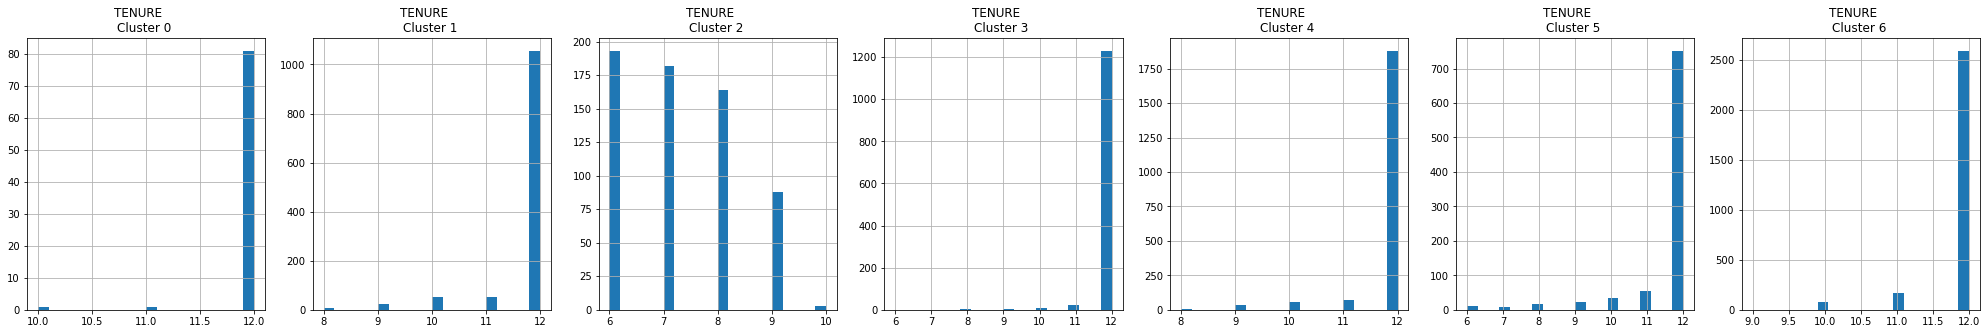

In [89]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### VII. Application of PCA:

Principal Component Analysis (PCA) is an unsupervised ML agorithm that could be used for dimensionality reduction by trying to find a new set of features called components while maintaining the original information unchanged.
PCA is used to reduce highly correlated features of data into  afew man, uncorrelated composite variables. PCA works by trying to find a new set of features called component and components are composites of the uncorrelated given input features.

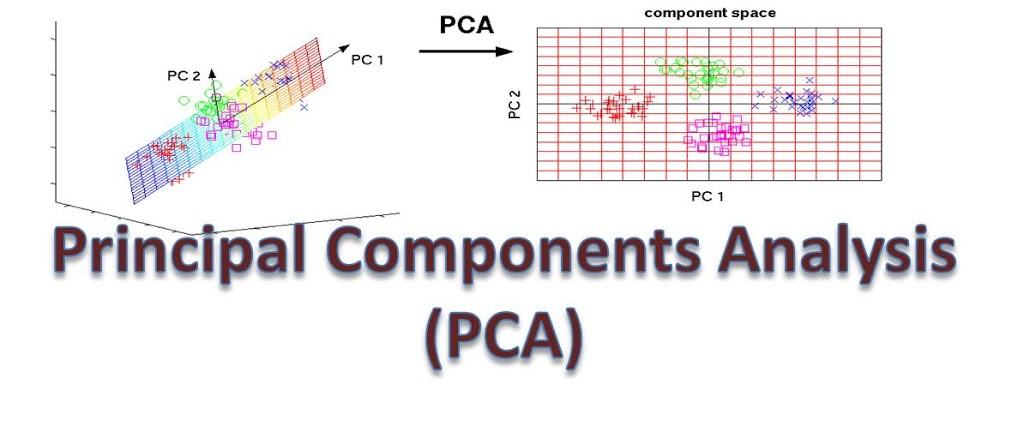

In [91]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222273, -1.0764397 ],
       [-1.1383057 ,  2.5065269 ],
       [ 0.96967949, -0.38350399],
       ...,
       [-0.92620407, -1.81078572],
       [-2.33655107, -0.65797054],
       [-0.55641864, -0.40048372]])

In [92]:
# Create a dataframe with the two components
pca_creditcard_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_creditcard_df.head()

,pca1,pca2
0,-1.682223,-1.076440
1,-1.138306,2.506527
2,0.969679,-0.383504
3,-0.873619,0.043136
4,-1.599440,-0.688556


In [93]:
# Concatenate the clusters labels to the dataframe
pca_creditcard_df = pd.concat([pca_creditcard_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_creditcard_df.head()

,pca1,pca2,cluster
0,-1.682223,-1.076440,6
1,-1.138306,2.506527,5
2,0.969679,-0.383504,3
3,-0.873619,0.043136,6
4,-1.599440,-0.688556,6


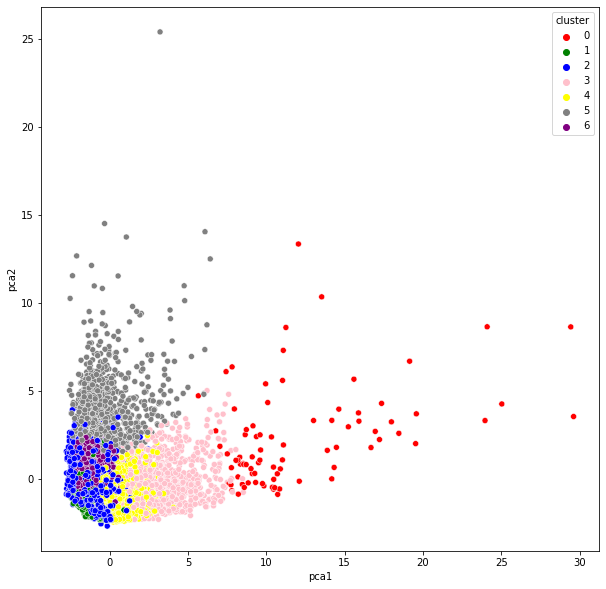

In [94]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_creditcard_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

To conclude, we can visualize all these various clusters in the PCA space. For example, cluster 0 include the transactors while cluster 1 include the revolvers.